# Use Case - Credit Scoring

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>
<br>
First thing first, we want to classify 'datatest' into class 'Terlambat' or 'Tidak Terlambat'. To do this, there are many classification algorithm, for instances Logistic Regression, Decision Tree, Random Forrest, KNN, Naive Bayes, and others. To choose which models to use, first we must know our 'data'.
<br>
<br>

In [2]:
data=pd.read_csv('training.csv')
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


<br>
<br>
There are some feature that incorectly classify as incorect type. For instance, SEX is int64 (it should be object) so we change each incorrectly type features<br>
We also drop column "ID" 
<br>
<br>

In [4]:
data=data.drop(columns='ID')
categ=['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3','TARGET']

In [5]:
data[categ]=data[categ].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null object
EDUCATION    16625 non-null object
SEX          16625 non-null object
AGE          16625 non-null int64
PAY_1        16625 non-null object
PAY_2        16625 non-null object
PAY_3        16625 non-null object
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null object
dtypes: float64(7), int64(1), object(7)
memory usage: 1.9+ MB


<br>
<br>
We check is there are null vallues. Turn out, there aren't any.
<br>
<br>

In [6]:
data.isnull().sum()

LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

## Visualization and Data Exploration
<br>
First we analyze categorical variable by spliting the data itu data category and data numeric

In [8]:
data_categ=data[categ]
data_numer=data.drop(columns=categ)
numer=data_numer.columns

<br>
<br>
Next, we want to analyze to get insights from data.
<br>
<br>

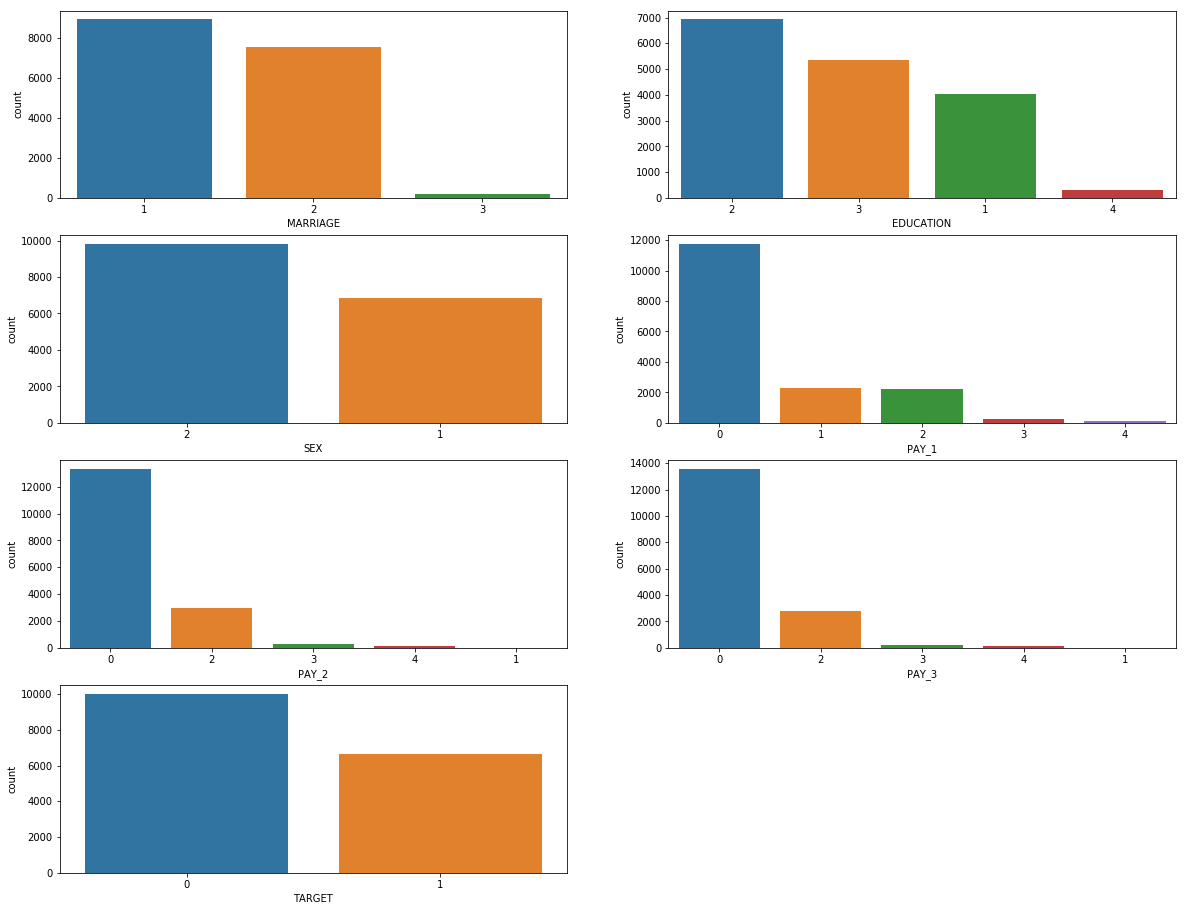

In [9]:
f=plt.figure(figsize=(20,20))
j=1
for i in categ:
    f.add_subplot(5,2,j)
    sns.countplot(data_categ[i],order=data_categ[i].value_counts().index)
    
    j+=1
    
plt.show()

<br>
<br>
Here we can see the comparison on each category variables. For example MARRIAGE '1' or 'belum menikah" is the most frequent to occur in data compared to 'menikah' and others. in EDUCATION, we see that '2' or 'D3/S1' is more frequent than '3' or 'SMA'. It means that in this data, majority person has degree more than High Schools. Also, we see in TARGET data that '0' it the most frequent class
<br>
<br>

<br>
<br>
For Numeric, we see hist plot of each variables
<br>
<br>

C:\Users\andrea064120\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


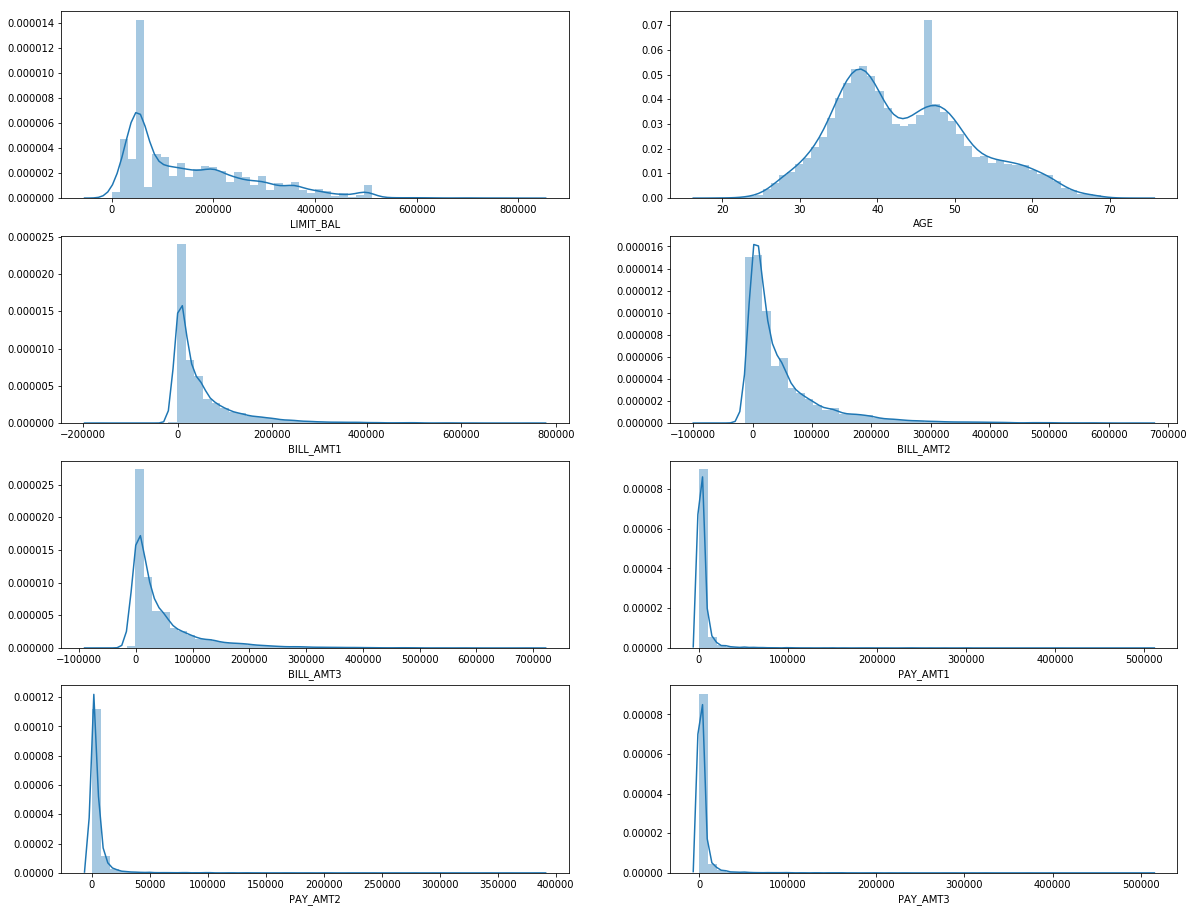

In [10]:
f=plt.figure(figsize=(20,20))
j=1
for i in numer:
    f.add_subplot(5,2,j)
    sns.distplot(data_numer[i])
    
    j+=1
    
plt.show()

<br>
<br>
For some variables, except for AGE are right skewed with many outliers. It make sense that age has nearly simetric distribution as random person is likely to fall from 30 to 50
<br>
<br>
After we see each variables plots, we want to know if there are any correlation in numeric variables. Corelation more than 0.5 means that the variables is corelated, and can caused to multicolinearity. 
<br>


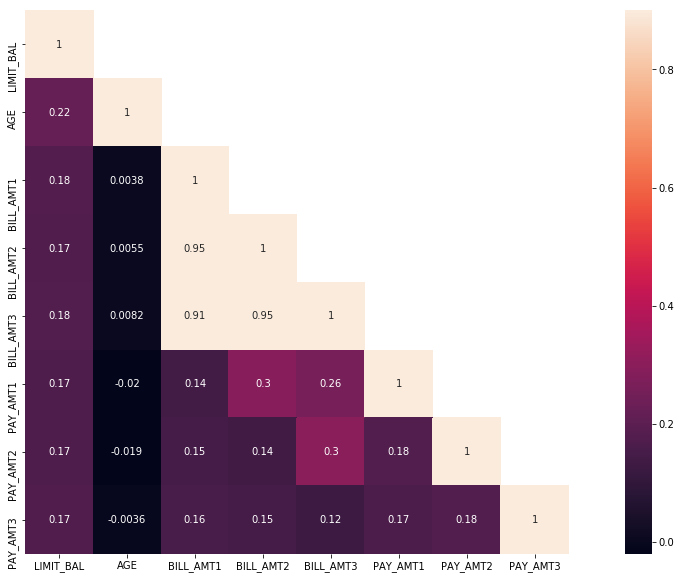

In [200]:
#create correlation with hitmap

#create correlation
corr = data_numer.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,5))
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<br>
<br>
There are 3 variable that is highly correlated, that is BILL_AMT1, BILL_AMT2, and BILL_AMT3. It is recomended to drop 2 of these variablesas these would cause multicolinearity. We see in Model below the effect of these variables.<br>
After that we use box plot to see is there are any outliers in data. In the modeling section, we use RANDOM FORREST which is robust to outliers, even to multicollinearity (still debatable). 
<br>
<br>


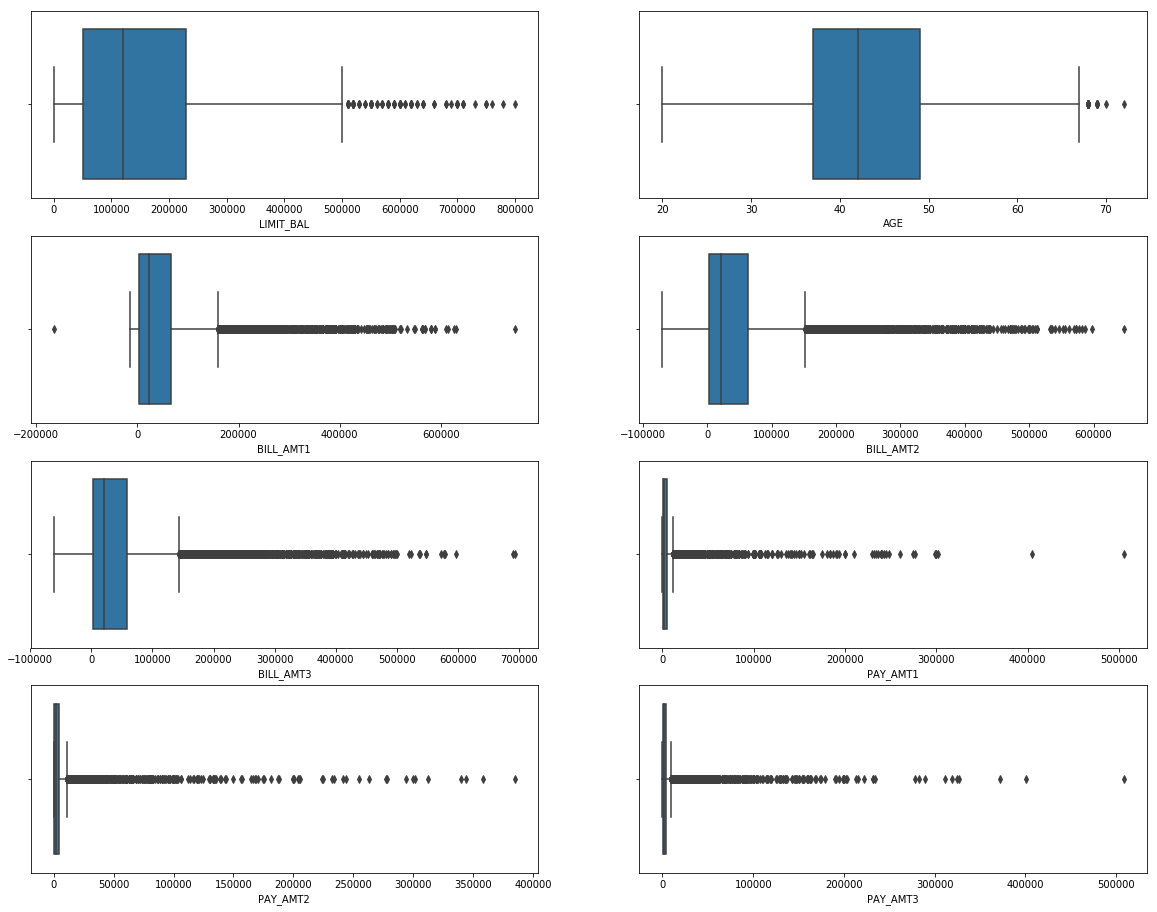

In [201]:
f=plt.figure(figsize=(20,20))
j=1
for i in numer:
    f.add_subplot(5,2,j)
    sns.boxplot(data_numer[i])
    
    j+=1
    
plt.show()

<br>
<br>
<br>
Based on analysis above, we see that there are many outliers, and there are multicollinearity in data. We do not remove any outliers because we do not know if it was the result of human error or customer behaviour is an important information that we should not remove. For instances PAY_AMT3, there is observation who has more than 500000. We can see in the box plot, it is an extreme outliers, but it could be caused by a customer (not data input error) and has information value.
<br>
<br>
<br>

## Modeling USING RANDOM FORREST and XGBOOST

<br>
We use random forrest because there are many outliers in the data. Random forrest which is esentialy decision Tree algorithm (and its differentation) is robust to outliers, and even multicollinearity (for multicollinearity its still debatable ). First we compare each model using Random Forrest and XGBOOST (which is esentialy modified random forrest)
<br>
<br>
For categorical variables, we use get_dummies which is kinda like OneHotEncoder. We drop first column so that there wont be multicollinearity (even if these models does not affect much from it). 

In [85]:
data_rf=pd.get_dummies(data,drop_first=True)
data_rf.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_2,MARRIAGE_3,...,PAY_1_4,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,TARGET_1
0,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>
We use 70% train and 30% test

In [86]:
from sklearn.model_selection import train_test_split
x=data_rf.drop(columns='TARGET_1')
y=data_rf['TARGET_1']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)
x.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_2,MARRIAGE_3,...,PAY_1_3,PAY_1_4,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4
0,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier

rf=RandomForestClassifier(n_estimators=100)
xgb=XGBClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)
xgb.fit(xtrain,ytrain)
result=pd.DataFrame()
result['real']=ytest.tolist()
result['predict rf']=rf.predict(xtest)
result['predict xgb']=xgb.predict(xtest)

pred_rf=result['predict rf']
pred_xgb=result['predict xgb']

result.head(10)


,real,predict rf,predict xgb
0,1,1,1
1,1,1,0
2,1,1,1
3,1,1,1
4,0,0,1
5,0,0,0
6,1,1,0
7,0,0,0
8,0,0,0
9,0,0,0


<br>
<br>
For model validation using xtest and ytest, we use accuracy, AUC,precission, recall, and F1 score. The more closer these statistic to one, the better
<br>
<br>

In [88]:
from sklearn import metrics
print('Accuracy RF',metrics.accuracy_score(ytest,pred_rf))

print('Accuracy XGB',metrics.accuracy_score(ytest,pred_xgb))

Accuracy RF 0.8847233360064154
Accuracy XGB 0.8748997594226142


In [89]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(ytest.astype('int')), pred_rf.astype('int'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC RF',roc_auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(ytest.astype('int')), pred_xgb.astype('int'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC XGB',roc_auc)

AUC RF 0.8759730006609108
AUC XGB 0.8640157077316517


In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('f1 score RF',f1_score(ytest, pred_rf, average="macro"))
print('precision RF',precision_score(ytest, pred_rf, average="macro"))
print('recall RF',recall_score(ytest, pred_rf, average="macro"))

print('\n')
print('\n')

print('f1 score XGB',f1_score(ytest, pred_xgb, average="macro"))
print('precision XGB',precision_score(ytest, pred_xgb, average="macro"))
print('recall XGB',recall_score(ytest, pred_xgb, average="macro"))

f1 score RF 0.8788866353823904
precision RF 0.882498636487592
recall RF 0.8759730006609108




f1 score XGB 0.868056021861793
precision XGB 0.873541877155713
recall XGB 0.8640157077316517


<br>
We see that Random Forest is the better model than XGB for these data. So we use Random Forrest. To make it has better ressult, we drop un important variables and also tune some parameter in random Forrest

In [91]:
comparison=[metrics.accuracy_score(ytest,pred_rf),auc(false_positive_rate, true_positive_rate),
            f1_score(ytest, pred_rf, average="macro"),precision_score(ytest, pred_rf, average="macro"),
           recall_score(ytest, pred_rf, average="macro")]

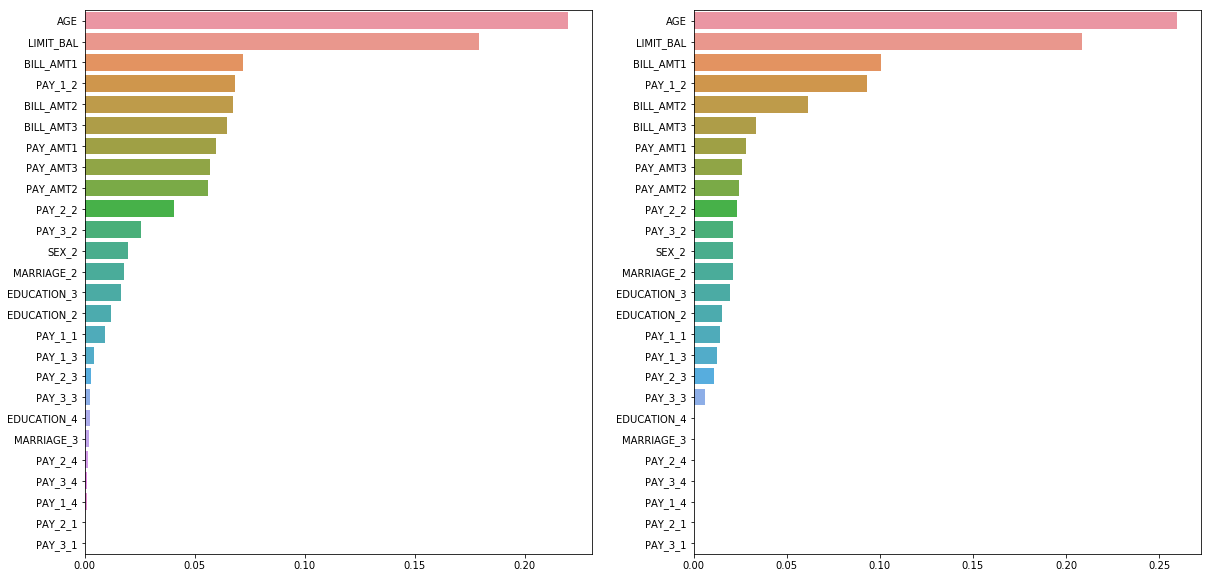

In [95]:
f=plt.figure(figsize=(20,10))
f.add_subplot(1,2,1)
feature_imp = pd.Series(rf.feature_importances_,index=data_rf.columns[:-1]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

f.add_subplot(1,2,2)
feature_imp2 = pd.Series(xgb.feature_importances_,index=data_rf.columns[:-1]).sort_values(ascending=False)
sns.barplot(x=feature_imp2, y=feature_imp.index)

plt.show()

<br>
<br>
We see that from below, PAY_3_1 to PAY_1_3 has litte feature importance, so we remove those variables.
<br>

## Deleting Unimportant Features and Tuning


In [193]:
drop_feature=feature_imp[:-10].index.tolist()
from sklearn.model_selection import train_test_split
x=data_rf[drop_feature]    # Throw Unimportant Features
y=data['TARGET']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)
x.head()
drop_feature

['AGE',
 'LIMIT_BAL',
 'BILL_AMT1',
 'PAY_1_2',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT3',
 'PAY_AMT2',
 'PAY_2_2',
 'PAY_3_2',
 'SEX_2',
 'MARRIAGE_2',
 'EDUCATION_3',
 'EDUCATION_2',
 'PAY_1_1']

In [194]:
from sklearn.ensemble import RandomForestClassifier  

rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
result=pd.DataFrame()
result['Predict']=rf.predict(xtest)
result['Real']=ytest.tolist()
result.head(10)

,Predict,Real
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [196]:
from sklearn.metrics import accuracy_score,roc_curve,auc,f1_score,precision_score,recall_score
compare2=[]
compare2.append(metrics.accuracy_score(ytest,result['Predict']))

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(ytest.astype('int')), result['Predict'].astype('int'))
roc_auc = auc(false_positive_rate, true_positive_rate)
compare2.append(roc_auc)

compare2.append(f1_score(ytest, result['Predict'], average="macro"))
compare2.append(precision_score(ytest, result['Predict'], average="macro"))
compare2.append(recall_score(ytest, result['Predict'], average="macro"))

In [197]:
compare=pd.DataFrame(comparison,columns=['RF Original'],index=['Accuracy','AUC','f1 score','precision','recall'])
compare['RF tuning']=compare2
compare

,RF Original,RF tuning
Accuracy,0.884723,0.89174
AUC,0.864016,0.88467
f1 score,0.878887,0.88660
precision,0.882499,0.88882
recall,0.875973,0.88467


<br>
<br>
We see that after tuning and Droping unimportant features, we get better model resulf of Random Forrest 
<br>
<br>


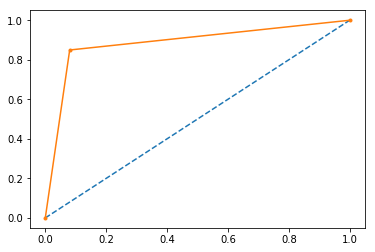

In [198]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(false_positive_rate, true_positive_rate, marker='.')
# show the plot
plt.show()

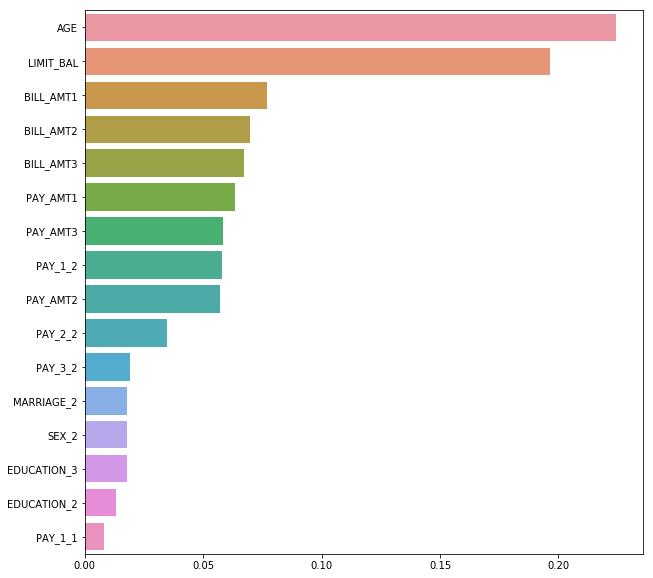

In [199]:
feature_imp2 = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp2, y=feature_imp2.index)
plt.show()

<br>
Above you see ROC curve and Feature Importance. If we have time, we also should tried to drop some more variables until there are no increasing of statistic validation model. Frow now, we use this last model as the best model. With all statistic validation more than 85%, it indicate that this is a good model (some says >70% is good)
<br>
We use this model to clasify datatest<br>
We know that we only need this variables

In [200]:
drop_feature

['AGE',
 'LIMIT_BAL',
 'BILL_AMT1',
 'PAY_1_2',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT3',
 'PAY_AMT2',
 'PAY_2_2',
 'PAY_3_2',
 'SEX_2',
 'MARRIAGE_2',
 'EDUCATION_3',
 'EDUCATION_2',
 'PAY_1_1']

In [214]:
test=pd.read_csv('testing.csv',delimiter=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


<br>
To this data fits to our model, first we clean this data to has similliar features like training
<br>

In [215]:
test=test.drop(columns='ID')

In [218]:
categ_test=categ[:-1]
test[categ_test]=test[categ_test].astype('str')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 14 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null object
EDUCATION    16625 non-null object
SEX          16625 non-null object
AGE          16625 non-null int64
PAY_1        16625 non-null object
PAY_2        16625 non-null object
PAY_3        16625 non-null object
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


<br>
Then, we use pd_get dummies to this data and drop unecessary features. Notes that because we use pd.get_dummies, we must use get_dummies to our data train to get the same dummies. This is a drawback of not using OneHotEncoder

In [219]:
mix=data.drop(columns='TARGET')
print(data.columns)
print(mix.shape)
mix.tail(2)

Index(['LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'SEX', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'TARGET'],
      dtype='object')
(16625, 14)


,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
16623,430000.0,1,1,1,61,1,0,0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0
16624,410000.0,1,2,1,61,0,0,0,47929.0,48905.0,49764.0,2078.0,1800.0,1430.0


In [220]:
mix=mix.append(test,ignore_index=True)
mix.shape

(33250, 14)

In [221]:
mix=pd.get_dummies(mix)
mix.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_1,MARRIAGE_2,...,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4
0,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,1,0,...,1,0,0,0,0,1,0,0,0,0


<br>
Notes that our test csv will be located on the 16624 th index 
<br>
so we slice our mix data again

In [222]:
test_t=mix.iloc[16625:,:]
print(test_t.shape)
test_t.head()

(16625, 32)


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_1,MARRIAGE_2,...,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4
16625,30000.0,40,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16626,20000.0,41,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16627,20000.0,36,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16628,20000.0,35,2948.0,3372.0,0.0,1000.0,0.0,0.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16629,170000.0,38,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,1,0,...,1,0,0,0,0,1,0,0,0,0


<br>
Now our test set is the same to the original test set but with the same OneHotEncoder as the training model. 
<br>
Next, we drop unimportant variables and predict the class in this data

In [223]:
test_p=test_t[drop_feature]
test_p.head()

,AGE,LIMIT_BAL,BILL_AMT1,PAY_1_2,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT3,PAY_AMT2,PAY_2_2,PAY_3_2,SEX_2,MARRIAGE_2,EDUCATION_3,EDUCATION_2,PAY_1_1
16625,40,30000.0,24430.0,0,23881.0,24234.0,1600.0,1296.0,1287.0,0,0,1,0,0,0,0
16626,41,20000.0,16474.0,1,17203.0,18411.0,1300.0,824.0,1500.0,0,0,1,0,0,0,0
16627,36,20000.0,18600.0,0,17947.0,18758.0,1367.0,712.0,1178.0,0,0,1,0,0,0,0
16628,35,20000.0,2948.0,0,3372.0,0.0,1000.0,0.0,0.0,0,0,1,0,0,0,0
16629,38,170000.0,145196.0,0,110163.0,112157.0,13998.0,4000.0,3760.0,0,0,1,0,0,0,0


In [224]:
data_rf[drop_feature].columns

Index(['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_1_2', 'BILL_AMT2', 'BILL_AMT3',
       'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT2', 'PAY_2_2', 'PAY_3_2', 'SEX_2',
       'MARRIAGE_2', 'EDUCATION_3', 'EDUCATION_2', 'PAY_1_1'],
      dtype='object')

In [225]:
test_p[drop_feature].columns

Index(['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_1_2', 'BILL_AMT2', 'BILL_AMT3',
       'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT2', 'PAY_2_2', 'PAY_3_2', 'SEX_2',
       'MARRIAGE_2', 'EDUCATION_3', 'EDUCATION_2', 'PAY_1_1'],
      dtype='object')

In [229]:
result_test=pd.DataFrame(rf.predict(test_p),columns=['Predict Test'])
result_test

,Predict Test
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


<br>
Now we have predicted testdata and now evaluate the result with our user
<br>


#### CREATED BY: ANDREAS MULYA RAHARDJA